In [183]:
import pandas as pd

In [184]:
df = pd.read_csv(r"C:\Users\hb292\Downloads\House_Rent_Dataset.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [185]:
df.info

<bound method DataFrame.info of        Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors

In [186]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [187]:
X =X = df.drop(columns=[
    "Posted On", 
    "Area Locality",
    "City",
    "Furnishing Status",
    "Tenant Preferred",
    "Point of Contact",
    "Floor",
    "Rent", 
    "Area Type"   # also remove target from features
])



Y = df['Rent']

In [188]:
df.shape

(4746, 12)

In [189]:
print(X.shape)

print(Y.shape)



(4746, 3)
(4746,)


In [190]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y ,test_size=0.25, random_state=42)

In [191]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
reg.fit(X_train,Y_train)

,alpha,0.1
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [192]:
X_train

,BHK,Size,Bathroom
1196,2,1300,2
2215,2,630,2
1598,1,600,1
1532,2,1045,2
1501,2,600,1
...,...,...,...
4426,3,1500,3
466,3,1200,2
3092,2,800,2
3772,3,3500,3


In [193]:
Y_train

1196    250000
2215     12000
1598      4500
1532     18000
1501     10000
         ...  
4426     25000
466      20000
3092     20000
3772     85000
860      25000
Name: Rent, Length: 3559, dtype: int64

In [194]:
y_pred = reg.predict(X_test)

In [195]:
y_pred

array([38797.87830913, 31538.31058565, 24714.31692557, ...,
       82911.94460241, 29118.45467782,  4847.20682874], shape=(1187,))

In [196]:
Y_test

1566    16000
3159    12000
538     28000
2630     8000
4418    46000
        ...  
978     65000
2458     6000
2471    75000
1432    31000
2395    22000
Name: Rent, Length: 1187, dtype: int64

In [197]:
from sklearn.metrics import r2_score
accuracy = r2_score(Y_test, y_pred)
print("Accuracy (R²):", accuracy)

Accuracy (R²): 0.3632632089956488


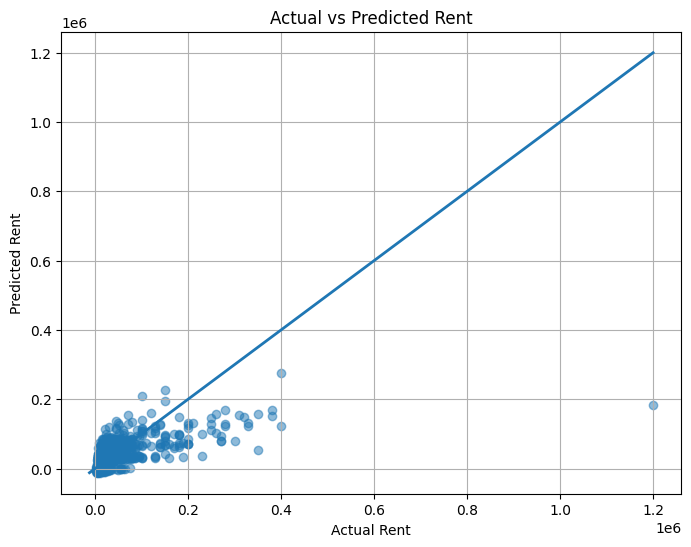

In [198]:
import matplotlib.pyplot as plt

# Predictions
y_pred = reg.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_pred, alpha=0.5)

# Perfect prediction line
min_val = min(Y_test.min(), y_pred.min())
max_val = max(Y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linewidth=2)

plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent")
plt.grid(True)
plt.show()


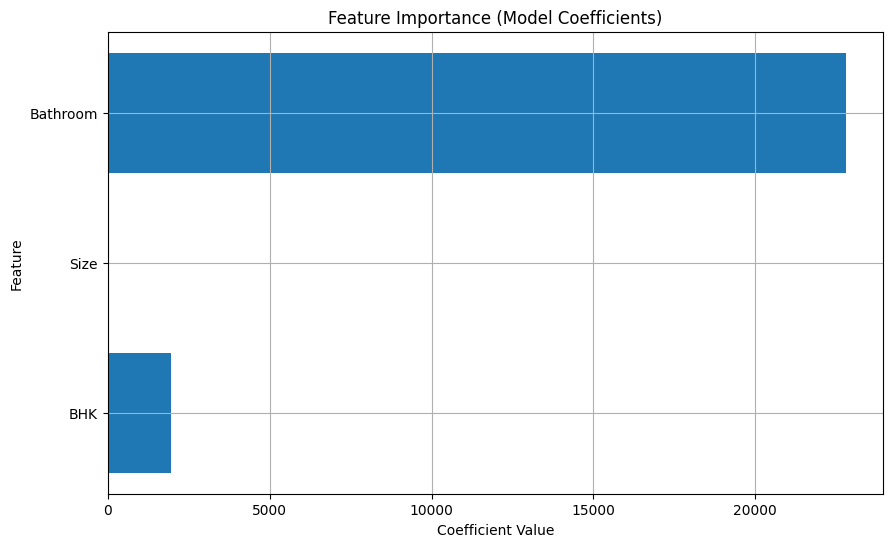

In [199]:
import matplotlib.pyplot as plt
import numpy as np

# Coefficients from model
coeffs =reg.coef_

# Feature names
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, coeffs)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Model Coefficients)")
plt.grid(True)
plt.show()
